# How well do jobs and skills pay for Data Analysts?

### Evaluate median salary for top 6 data jobs.
### Find median salary per skill for DA.
### Visualize highest paying skills and most demanded skills.

In [1]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df_clean = df.drop_duplicates().copy()
df_clean = df_clean.drop_duplicates(subset=['job_title','company_name','job_country'])
df_clean['job_skills'] = df_clean['job_skills'].apply(lambda skills:ast.literal_eval(skills)if pd.notna(skills)else skills)

In [2]:
df_US = df_clean[df_clean['job_country']=='United States'].dropna(subset='salary_year_avg')
df_US['month_no'] = df_US['job_posted_date'].dt.month

In [3]:
job_titles = df_US['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [5]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.to_list()

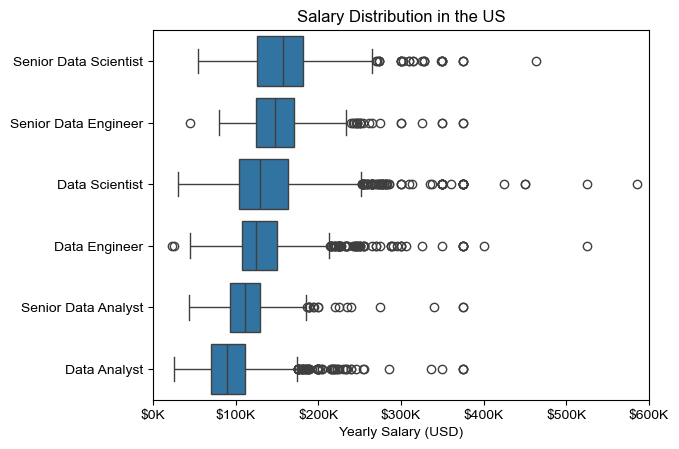

In [6]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the US')
plt.ylabel('')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y,_:f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate the Median salary VS skills for Data Analysts

In [7]:
df_US_DA = df_US[df_US['job_title_short']=='Data Analyst']
df_US_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_no
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",10
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}",2
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '...",1
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr...",11
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog...",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777412,Data Analyst,Data Analyst III,"Madison, WI",via Ladders,Full-time,False,"Illinois, United States",2023-02-09 13:01:37,False,False,United States,year,90000.0,NaN,AE Business Solutions,"[sql, python, r, power bi]","{'analyst_tools': ['power bi'], 'programming':...",2
777579,Data Analyst,Head of Data Analytics,"Austin, TX",via Ladders,Full-time,False,"Texas, United States",2023-10-23 05:02:56,False,True,United States,year,350000.0,NaN,Care.com,"[python, r, sql, snowflake, bigquery, tableau,...","{'analyst_tools': ['tableau', 'power bi', 'loo...",10
781697,Data Analyst,Applied Scientist,"Palo Alto, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-05-04 06:04:01,False,True,United States,year,198000.0,NaN,Amazon.com,"[go, python, java, c++, r, scikit-learn, spark...","{'libraries': ['scikit-learn', 'spark', 'mxnet...",5
782563,Data Analyst,Digital Communications Data Analyst,"Santa Monica, CA",via Ladders,Full-time,False,"California, United States",2023-01-11 06:00:44,False,True,United States,year,115000.0,NaN,RAND Corporation,"[sql, r, python, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ...",1


In [8]:
df_skills = df_US_DA.explode('job_skills')

df_DA_top_pay = df_skills.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)

df_DA_top_pay

,count,median
job_skills,,
mxnet,1,198000.0
bitbucket,2,189154.5
hugging face,1,175000.0
dplyr,1,167500.0
couchbase,1,160515.0
ansible,1,159640.0
golang,1,145000.0
swift,3,140500.0
gitlab,2,138750.0


In [9]:
df_DA_skills = df_skills.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10)

df_DA_skills = df_DA_skills.sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,903,97500.0
r,566,92527.5
sql server,197,92500.0
tableau,840,92279.0
sql,1597,90000.0
sas,590,90000.0
power bi,525,90000.0
powerpoint,306,85000.0
excel,1211,83500.0


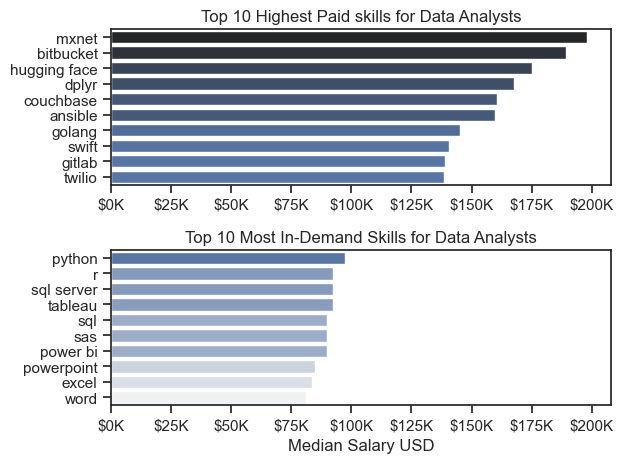

In [10]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')
sns.barplot(data=df_DA_top_pay, x='median', ax=ax[0], y=df_DA_top_pay.index, hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].set_ylabel('')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary USD')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()